# MADHURIMA PAUL (Team-4)

## Project Domain- Insurance

## Data - Insurance & non insurance pdf document

### Attribute information : To implement clustering algorithm attributes are extracted from the insurance document using different techniques. The fields are some of the important features of the insurance document. 

### Objective: To implement the given task of clustering and classifying insurance & non insurance pdf documents

# INDEX
- 1.[Flow Diagram](#section_FD)
- 2.[Library](#section_L)
- 3.[Data Engineering](#section_DE)
- 4.[Feature Extraction](#section_FE)
- 5.[Feature Selection](#section_FS)
- 6.[Scaling](#section_S)
- 7.[Modelling](#section_M)
- i.[Clustering Techniques](#section_CT)
- [Cluster Selection](#section_CS)
- [Best Model](#section_BM)
- ii.[Classification Algorithm](#section_CLA)
- 8.[Learning Outcome](#section_LO)
- 9.[References](#section_REF)

## VISUALIZATIONS
- 1.[Heatmap](#section_HM1)
- 2.[Elbow Method](#section_EL)
- 3.[Dendogram](#section_DEN)
- 4.[Scatter Plot](#section_SP)
- 5.[Silhouette Plot](#section_SIL)
- 6.[Countplot](#section_CP)
- 7.[Heatmap](#section_HM2)
- 8.[Confusion Matrix](#section_CM)
- 9.[Decision Tree Plot](#section_DTP)
- 10.[Random Forest Plot](#section_RFP)

## Flow Diagram (Steps & tasks)<a id="section_FD"></a>

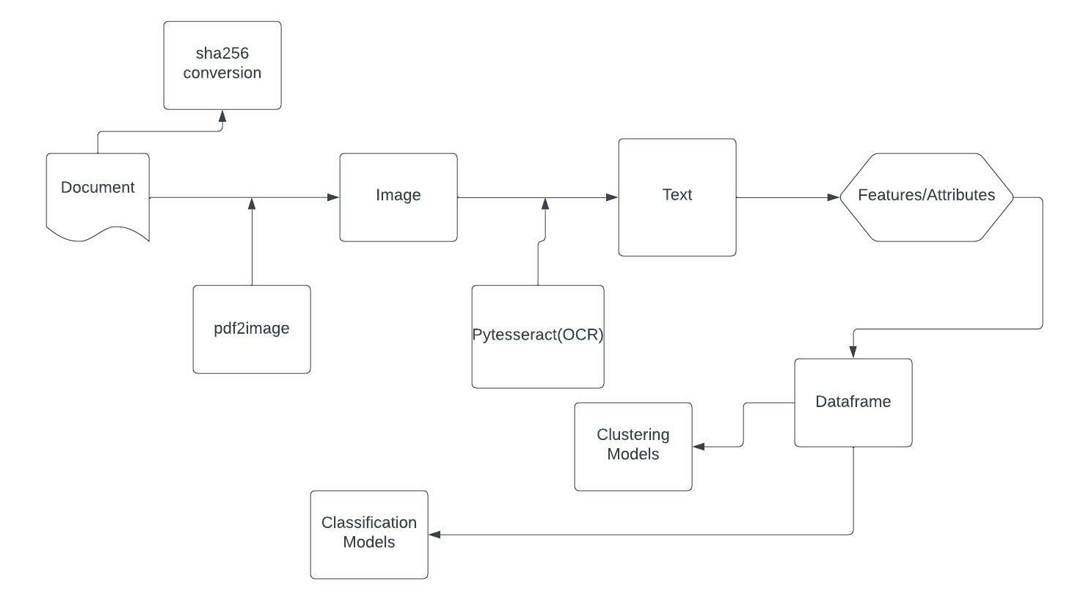

## Libraries<a id="section_L"></a>

In [ ]:
import de_mod_
import time
import tracemalloc
import os
import re
import time
import threading
import multiprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN,AgglomerativeClustering
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns 
from scipy.spatial.distance import cdist
from kneed import KneeLocator
warnings.filterwarnings('ignore')
from sklearn.svm import SVC # support vector classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler# set up the scaler

## Data Engineering<a id="section_DE"></a>

In [96]:
start_DE= time.time()

In [97]:
tracemalloc.start()

Current Working Directory  :  
C:\Users\MadhurimaPau_bhbpoof\Downloads\Team_4

Path in which the pdf files were stored :
C:\Users\MadhurimaPau_bhbpoof\Downloads\Team_4\train_data_pdfs

-----------------------------------------------------------------------------------------------------------------------------

PreProcessing of Data

-----------------------------------------------------------------------------------------------------------------------------
****************************************Word Cloud for common words in insurance pdfs****************************************




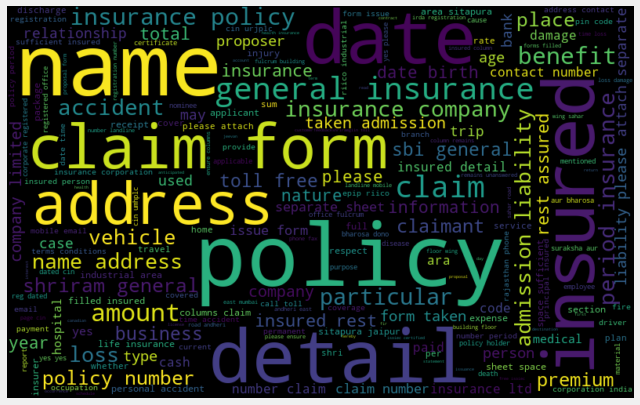

-----------------------------------------------------------------------------------------------------------------------------

Most common words in all the raw insurance pdfs :



,Words,Frequency_Count
0,insurance,189
1,policy,182
2,insured,151
3,name,129
4,claim,124
5,date,102
6,form,94
7,details,93
8,number,81
9,address,78


-----------------------------------------------------------------------------------------------------------------------------

Data Frame After Feature Extraction and Before Feature Engineering



,Pdf_Name,Encrypt_sha256,match
0,020816-claimform (1).pdf,4eb601ac6fda6be0a03776358e286ab053d63d3f3c1a52...,"[insurance, policy, insured, name, claim, date..."
1,020816-claimform.pdf,449b7f35e63e07375ff56750d4ccb596f9706a83ffdd79...,"[insurance, policy, insured, name, claim, date..."
2,2a6dbd6ce4724c7f95acaf83b4f9070d.pdf,ac65e2bb3ff4155fe069530f0fbd9798d6848a5aaf3796...,"[insurance, policy, insured, name, claim, date..."
3,7cb49840db6f4e9587d9c93042e4d7da.pdf,75ed96601c9a959b249b354f3ce8ff4f996fe84ec52ad6...,"[insurance, policy, insured, name, claim, date..."
4,8ee09c18efdf4a63a1e74c2461987aa6.pdf,60a373e42f8f88d5dde1d023c462edbbd2be5d184c2a50...,"[insurance, policy, insured, name, claim, date..."
...,...,...,...
68,SPDCL-HVDS Registration Application Form.pdf,442c8de538d88eb533e9640e1a3cfa9dbb692459c47c46...,"[name, form, details, number, address]"
69,Student Scholarship Application Form (Fresh).pdf,bc5f8b50a04e37b3f11bd3aebf9aa86c0d6fdb8f6cbbbe...,"[name, date, form, details, number, address]"
70,Student Scholarship Application Form (RENEWAL)...,63425e549dedba5bf156d6ec0dd4a3712bc462abfba0ad...,"[name, date, form, details, number, address]"
71,Travel-Insurance-Claim-Form.pdf,a775a668d19f7211fede35e69f6f00f92ea7c08d11160c...,"[insurance, policy, insured, name, claim, date..."





-----------------------------------------------------------------------------------------------------------------------------

Data Set is Saved!!!!!!

Data Frame After Feature Engineering   : 



,Pdf_Name,Encrypt_sha256,address,claim,date,details,form,insurance,insured,name,number,policy
0,020816-claimform (1).pdf,4eb601ac6fda6be0a03776358e286ab053d63d3f3c1a52...,1,1,1,1,1,1,1,1,1,1
1,020816-claimform.pdf,449b7f35e63e07375ff56750d4ccb596f9706a83ffdd79...,1,1,1,1,1,1,1,1,1,1
2,2a6dbd6ce4724c7f95acaf83b4f9070d.pdf,ac65e2bb3ff4155fe069530f0fbd9798d6848a5aaf3796...,1,1,1,1,1,1,1,1,0,1
3,7cb49840db6f4e9587d9c93042e4d7da.pdf,75ed96601c9a959b249b354f3ce8ff4f996fe84ec52ad6...,1,1,1,1,1,1,1,1,0,1
4,8ee09c18efdf4a63a1e74c2461987aa6.pdf,60a373e42f8f88d5dde1d023c462edbbd2be5d184c2a50...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68,SPDCL-HVDS Registration Application Form.pdf,442c8de538d88eb533e9640e1a3cfa9dbb692459c47c46...,1,0,0,1,1,0,0,1,1,0
69,Student Scholarship Application Form (Fresh).pdf,bc5f8b50a04e37b3f11bd3aebf9aa86c0d6fdb8f6cbbbe...,1,0,1,1,1,0,0,1,1,0
70,Student Scholarship Application Form (RENEWAL)...,63425e549dedba5bf156d6ec0dd4a3712bc462abfba0ad...,1,0,1,1,1,0,0,1,1,0
71,Travel-Insurance-Claim-Form.pdf,a775a668d19f7211fede35e69f6f00f92ea7c08d11160c...,1,1,1,1,1,1,1,1,0,1




******************************************************************************************************************************
************************************************************END OF************************************************************
*******************************************************DATA ENGINEERING*******************************************************


In [4]:
de_mod_.dataEngineering(tesseract_exe_path=r"C:\Users\MadhurimaPau_bhbpoof\AppData\Local\Programs\Tesseract-OCR\tesseract.exe")

In [5]:
end_DE= time.time()

In [6]:
mem_DE_c ,mem_DE_p= tracemalloc.get_traced_memory()
print("the current memory used by data engineering part ",mem_DE_c)
print("the Peak memory used by data engineering part during Execution",mem_DE_p)
tracemalloc.stop()

the current memory used by data engineering part  5122410
the Peak memory used by data engineering part during Execution 387916648


In [7]:
time_DE=end_DE-start_DE
print(f"Runtime of the Data Engineering Part is : {time_DE} secs")

Runtime of the Data Engineering Part is : 272.79546427726746 secs


### FEATURE ENGINEERING<a id="section_FE"></a>

In [98]:
# FEATURE ENGINEERING

for (root,dirs,file) in os.walk(os.getcwd()):
    for f in file:
        if ".csv" in f:
            ff = os.getcwd()+"\\"+f
            # code
            with open(ff,"r") as f1:
                lines = f1.readlines()[1]
            if bool(re.search(".pdf",lines)):
                if bool(re.search("insurance",lines)):
                    classification_data_path = ff
                else:
                    cluster_data_path = ff

In [99]:
cluster_data_path

'C:\\Users\\MadhurimaPau_bhbpoof\\Downloads\\Team_4\\dataset.csv'

In [100]:
df_n = pd.read_csv(cluster_data_path)
df_n.head()

,Unnamed: 0,Pdf_Name,Encrypt_sha256,address,claim,date,details,form,insurance,insured,name,number,policy
0,0,020816-claimform (1).pdf,4eb601ac6fda6be0a03776358e286ab053d63d3f3c1a52...,1,1,1,1,1,1,1,1,1,1
1,1,020816-claimform.pdf,449b7f35e63e07375ff56750d4ccb596f9706a83ffdd79...,1,1,1,1,1,1,1,1,1,1
2,2,2a6dbd6ce4724c7f95acaf83b4f9070d.pdf,ac65e2bb3ff4155fe069530f0fbd9798d6848a5aaf3796...,1,1,1,1,1,1,1,1,0,1
3,3,7cb49840db6f4e9587d9c93042e4d7da.pdf,75ed96601c9a959b249b354f3ce8ff4f996fe84ec52ad6...,1,1,1,1,1,1,1,1,0,1
4,4,8ee09c18efdf4a63a1e74c2461987aa6.pdf,60a373e42f8f88d5dde1d023c462edbbd2be5d184c2a50...,1,1,1,1,1,1,1,1,0,1


In [26]:
df_n.columns

Index(['Unnamed: 0', 'Pdf_Name', 'Encrypt_sha256', 'address', 'claim', 'date',
       'details', 'form', 'insurance', 'insured', 'name', 'number', 'policy'],
      dtype='object')

In [15]:
# To Transform into Numerical data
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [27]:
# Numeric data
model.encode(df_n["Encrypt_sha256"])

array([[-0.97458106,  0.07930266,  0.9315769 , ..., -0.6053869 ,
         0.18730874, -0.5262081 ],
       [-0.67183095, -0.15985574,  0.9965587 , ..., -0.5074225 ,
         0.13082515, -0.17219348],
       [-1.0740049 ,  0.03143206,  0.9761505 , ..., -0.54683995,
         0.06914381, -0.15796503],
       ...,
       [-0.7727977 ,  0.2763303 ,  0.93346506, ..., -0.7581596 ,
         0.31843972, -0.3516938 ],
       [-0.66418797, -0.3672122 ,  1.1647611 , ..., -0.29888207,
         0.14793603, -0.19084592],
       [-0.26206213, -0.4556855 ,  0.9335045 , ..., -0.66058284,
         0.28039873, -0.09218962]], dtype=float32)

In [28]:
df_n['encoded_avg'] = df_n["Encrypt_sha256"].apply(lambda x: np.average(model.encode(x)))
df_n.head()

,Unnamed: 0,Pdf_Name,Encrypt_sha256,address,claim,date,details,form,insurance,insured,name,number,policy,encoded_avg
0,0,020816-claimform (1).pdf,4eb601ac6fda6be0a03776358e286ab053d63d3f3c1a52...,1,1,1,1,1,1,1,1,1,1,-0.020767
1,1,020816-claimform.pdf,449b7f35e63e07375ff56750d4ccb596f9706a83ffdd79...,1,1,1,1,1,1,1,1,1,1,-0.021267
2,2,2a6dbd6ce4724c7f95acaf83b4f9070d.pdf,ac65e2bb3ff4155fe069530f0fbd9798d6848a5aaf3796...,1,1,1,1,1,1,1,1,0,1,-0.020336
3,3,7cb49840db6f4e9587d9c93042e4d7da.pdf,75ed96601c9a959b249b354f3ce8ff4f996fe84ec52ad6...,1,1,1,1,1,1,1,1,0,1,-0.020169
4,4,8ee09c18efdf4a63a1e74c2461987aa6.pdf,60a373e42f8f88d5dde1d023c462edbbd2be5d184c2a50...,1,1,1,1,1,1,1,1,0,1,-0.021373


In [29]:
df_n.drop("Unnamed: 0",axis=1,inplace=True)


In [30]:
df_n.head(2)

,Pdf_Name,Encrypt_sha256,address,claim,date,details,form,insurance,insured,name,number,policy,encoded_avg
0,020816-claimform (1).pdf,4eb601ac6fda6be0a03776358e286ab053d63d3f3c1a52...,1,1,1,1,1,1,1,1,1,1,-0.020767
1,020816-claimform.pdf,449b7f35e63e07375ff56750d4ccb596f9706a83ffdd79...,1,1,1,1,1,1,1,1,1,1,-0.021267


### VISUALIZATION-HEATMAP<a id="section_HM1"></a>

Text(0.5, 1.0, 'Correlation Between Numerical Features')

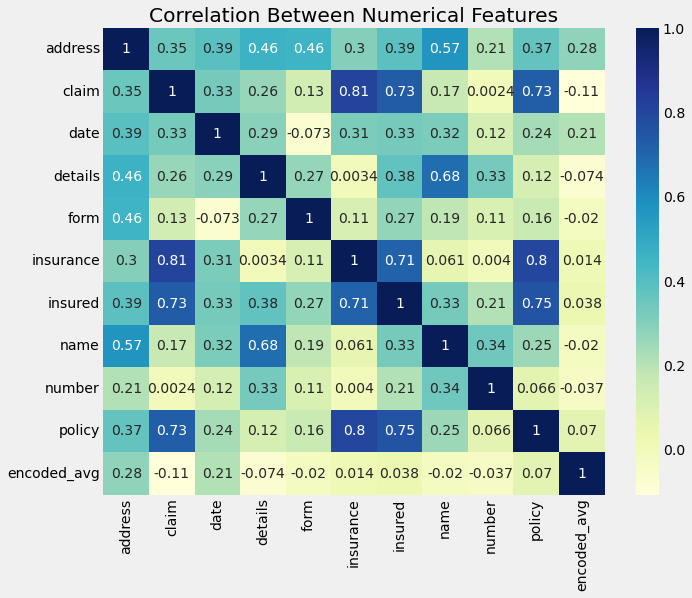

In [31]:
# Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df_n[df_n.describe().columns.tolist()].corr(), cmap="YlGnBu", annot=True, xticklabels='auto')
plt.title('Correlation Between Numerical Features')

# FEATURE SELECTION<a id="section_FS"></a>

In [32]:
def feature_selection(data, pos_corr=0.6, neg_corr=-0.5):
    data = data[data.describe().columns.tolist()]
    # Create correlation matrix
    corr_matrix = data.corr()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.95
    selected_cols = [column for column in upper.columns if any(upper[column] > pos_corr) or any(upper[column] < neg_corr)]
    return selected_cols

# feature_selection(df, pos_corr=0.5, neg_corr=-0.1)
# selected_feats = feature_selection(df)
# selected_feats

### SCALING<a id="section_S"></a>

In [33]:

num_cols = df_n.describe().columns.tolist()
def apply_scaling(data, scaler, feat_selection=None):
    if feat_selection == True:
        selected_feats = feature_selection(data)
        df = data[selected_feats]
    else:
        df = data[num_cols]
        
    s = scaler()
    s_data = s.fit_transform(df)
    scaled_df = pd.DataFrame(s_data, columns = df.columns)
    return scaled_df

## Modelling:<a id="section_M"></a>

## CLUSTERING TECHNIQUES<a id="section_CT"></a>

In [40]:
def K_means(data,n_clusters=2):
    selected_feats = feature_selection(data)
    data = data[selected_feats]
    model = KMeans(n_clusters=n_clusters)
    model.fit(data)
    cluster_centers = np.sort(model.cluster_centers_, axis = 0)
    labels = pairwise_distances_argmin(data, cluster_centers)
    metrics = {"Model": model, "Silhouette Score":silhouette_score(data,labels)}
    print(metrics,f"\nSilhouette coefficient: {silhouette_score(data,labels):0.2f}",f"\n\nInertia:{model.inertia_}",f"\n\nLabels : {labels}")

In [41]:
def MiniBatch(data,n_clusters=2):
    selected_feats = feature_selection(data)
    data = data[selected_feats]
    model = MiniBatchKMeans(init ='k-means++', n_clusters=n_clusters, batch_size=2, n_init=10, max_no_improvement=10, verbose=0)
    model.fit(data)
    labels = pairwise_distances_argmin(data, model.cluster_centers_)
    metrics = {"Model": model, "Silhouette Score":silhouette_score(data,labels)}
    print(metrics,f"\nSilhouette coefficient: {silhouette_score(data,labels):0.2f}",f"\n\nInertia:{model.inertia_}",f"\n\nLabels : {labels}")

In [42]:
def DBScan(data,n_clusters=2):
    selected_feats = feature_selection(data)
    data = data[selected_feats]
    model = DBSCAN(eps = 0.0375, min_samples = 5)
    model.fit(data)
    metrics = {"Model": model, "Silhouette Score":silhouette_score(data, model.labels_)}
    print(metrics,f"\nSilhouette coefficient: {silhouette_score(data, model.labels_)}",f"\nLabels: {model.labels_}")

In [43]:
def Agglo(data,n_clusters=2):
    selected_feats = feature_selection(data)
    data = data[selected_feats]
    model = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
    model.fit_predict(data)
    metrics = {"Model": model, "Silhouette Score":silhouette_score(data, model.labels_)}
    print(metrics,f"\nSilhouette coefficient: {silhouette_score(data, model.labels_)}",f"\nLabels: {model.labels_}")

In [44]:
start_cluster= time.time()
tracemalloc.start()

t11 = threading.Thread(target = K_means,args=(df_n,2))
t22 = threading.Thread(target = MiniBatch,args=(df_n,2))
t33 = threading.Thread(target = DBScan,args=(df_n,2))
t44 = threading.Thread(target = Agglo,args=(df_n,2))


t11.start()
t22.start()
t33.start()
t44.start()


t11.join()
t22.join()
t33.join()
t44.join()


end_cluster= time.time()
mem_CT_c ,mem_CT_p= tracemalloc.get_traced_memory()
print("the current memory used by Cluster modelling part ",mem_CT_c)
print("the Peak memory used by Cluster modelling part during Execution",mem_CT_p)
tracemalloc.stop()
time_CT = end_cluster-start_cluster
print(f"Runtime of the Cluster Modelling Part is : {time_CT} secs")

{'Model': AgglomerativeClustering(), 'Silhouette Score': 0.6362371810109834} 
Silhouette coefficient: 0.6362371810109834 
Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
{'Model': DBSCAN(eps=0.0375), 'Silhouette Score': 0.7667883257859607} 
Silhouette coefficient: 0.7667883257859607 
Labels: [ 0  0  0  0  0  0  0 -1  1  1  1  1  1  1  0  1  0  0  0 -1  1  0  0  0
  1  0 -1 -1 -1 -1  1  0 -1  0 -1 -1 -1  0 -1  1  1 -1  1 -1  0  0  1 -1
  2  2  2  2  2  2  0  0  0  0 -1  0  0  0  0  0 -1  0  0  1  1  1  1  0
  0]
{'Model': KMeans(n_clusters=2), 'Silhouette Score': 0.6683540982750991} 
Silhouette coefficient: 0.67 

Inertia:22.572100313479606 

Labels : [1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1]
{'Model': MiniBatchKMeans(batch_size=2, n_clusters=2, n_init=10), 'Silhouette Score

## CLUSTER SELECTION<a id="section_CS"></a>

In [50]:

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 6)
num_cols = [c for c in df_n.describe().columns.tolist()]
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_n[num_cols])
    kmeanModel.fit(df_n[num_cols])
 
    distortions.append(sum(np.min(cdist(df_n[num_cols], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_n[num_cols].shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_n[num_cols], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_n[num_cols].shape[0]
    mapping2[k] = kmeanModel.inertia_
# Distortion based on k-values
for key, val in mapping1.items():
    print(f'Clusters : {key} :: distortion: {val}')

Clusters : 1 :: distortion: 1.4235828569800122
Clusters : 2 :: distortion: 1.0452549423377957
Clusters : 3 :: distortion: 0.9091488560510953
Clusters : 4 :: distortion: 0.8411804812423653
Clusters : 5 :: distortion: 0.7699703811410532


**Distortion :**

It is calculated as the average of the squared distances from the cluster centers of the respective clusters

**Intertia :**

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

**Silhouette :**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
* score close to 1: Means clusters are well apart from each other and clearly distinguished.
* score close to 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* score close to -1: Means clusters are assigned in the wrong way

## BEST MODEL<a id="section_BM"></a>

In [47]:

# Cluster Modelling Function
def apply_clustering(algorithm=None,n_clusters=2,data=None,scale=None, feat_selection=None):
    # Applying Feature Selection
    if feat_selection == True:
        print("--"*11+"\nWith Feature Selection\n"+"--"*11)
        selected_feats = feature_selection(data)
        data = data[selected_feats]
    else:
        print("--"*13+"\nWithout Feature Selection\n"+"--"*13)
        data = data[data.describe().columns.tolist()]
        
    # Applying Scaling
    if scale == StandardScaler:
        data = apply_scaling(data, scale)
    elif scale == MinMaxScaler:
        data = apply_scaling(data, scale)
        
    # Applying Models
    if algorithm in [KMeans, MiniBatchKMeans]:
        if algorithm == KMeans:
            model = algorithm(n_clusters=n_clusters)
            model.fit(data)
            cluster_centers = np.sort(model.cluster_centers_, axis = 0)
            labels = pairwise_distances_argmin(data, cluster_centers)
            metrics = {"Model": model, "Silhouette Score":silhouette_score(data,labels)}
        elif algorithm == MiniBatchKMeans:
            model = MiniBatchKMeans(init ='k-means++', n_clusters=n_clusters, batch_size=2, n_init=10, max_no_improvement=10, verbose=0)
            model.fit(data)
            labels = pairwise_distances_argmin(data, model.cluster_centers_)
            metrics = {"Model": model, "Silhouette Score":silhouette_score(data,labels)}
        print(f"Model: {model}")
        print(f"\nSilhouette coefficient: {silhouette_score(data,labels):0.2f}")
        print(f"\n\nInertia:{model.inertia_}")
        print(f"\n\nLabels : {labels}")
        return metrics
    elif algorithm in [DBSCAN, AgglomerativeClustering]:
        if algorithm == DBSCAN:
            model = algorithm(eps = 0.0375, min_samples = 5)
            model.fit(data)
            metrics = {"Model": str(algorithm()), "Silhouette Score":silhouette_score(data, model.labels_)}
        elif algorithm == AgglomerativeClustering:
            model = algorithm(affinity='euclidean', linkage='ward')  
            model.fit_predict(data)
            metrics = {"Model": str(algorithm()), "Silhouette Score":silhouette_score(data, model.labels_)}
        print(f"Model: {model}")
        print(f"\nSilhouette coefficient: {silhouette_score(data, model.labels_)}")
        print(f"\nLabels: {model.labels_}")
        return metrics

----------------------------------------------------------------------------------------------------
----------------------
With Feature Selection
----------------------
Model: KMeans(n_clusters=2)

Silhouette coefficient: 0.67


Inertia:22.572100313479606


Labels : [1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1]
----------------------------------------------------------------------------------------------------
----------------------
With Feature Selection
----------------------
Model: MiniBatchKMeans(batch_size=2, n_clusters=2, n_init=10)

Silhouette coefficient: 0.66


Inertia:24.82142857142857


Labels : [1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1]
----------------------------------------------------------------------------------------------------
----------------------
With Feat

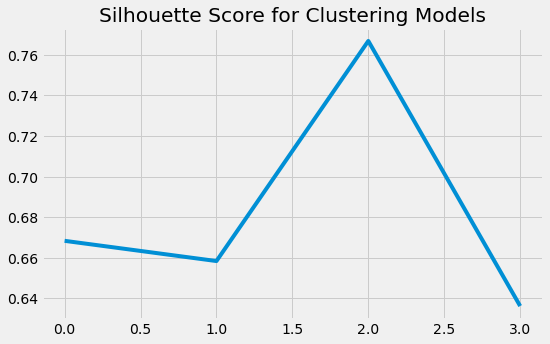

In [49]:
# Finding the Best Model 
models = [KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering]
metrics_df = pd.DataFrame()
for m in models:
    print("--"*50)
    metrics = apply_clustering(algorithm=m, n_clusters=2, data=df_n, feat_selection=True)
    metrics_df = metrics_df.append(metrics, ignore_index=True)  
print(metrics_df)
# Silhouette Score Plot
metrics_df['Silhouette Score'].plot(figsize=(8,5))
plt.title('Silhouette Score for Clustering Models')
plt.show()

## VISUALIZATION IN CLUSTERING

### ELBOW METHOD<a id="section_EL"></a>

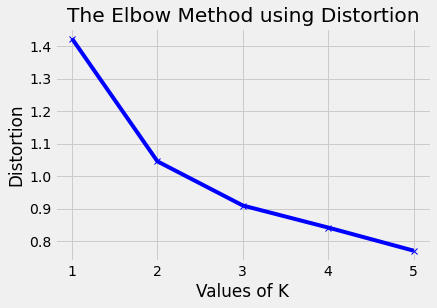

In [51]:
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Knee:  2


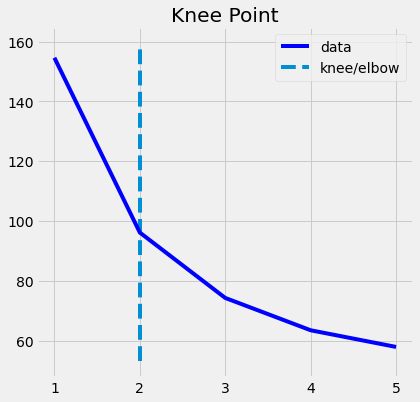

In [52]:

kl = KneeLocator( range(1, 6), inertias, curve="convex", direction="decreasing")
knee_point = kl.knee #elbow_point = kneedle.elbow
print('Knee: ', knee_point) #print('Elbow: ', elbow_point)
kl.plot_knee()

### DENDOGRAM<a id="section_DEN"></a>

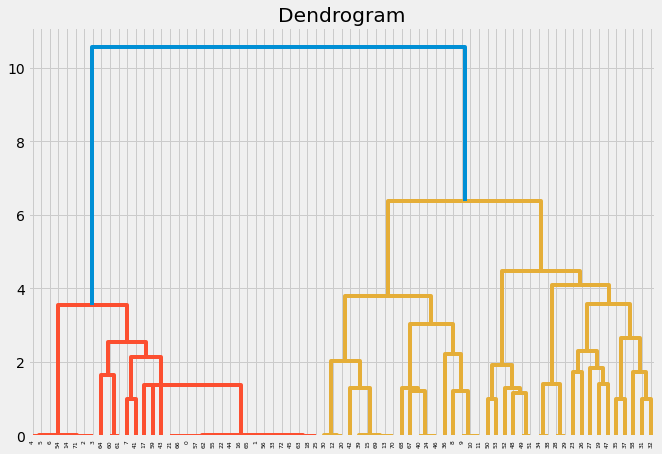

In [53]:
# Dendogram to select clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df_n[num_cols], method='ward'),orientation="top")

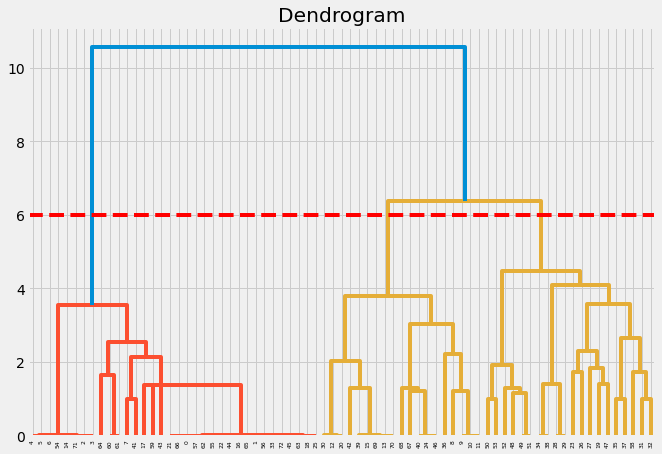

In [54]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df_n[num_cols], method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

### SCATTER PLOT<a id="section_SP"></a>

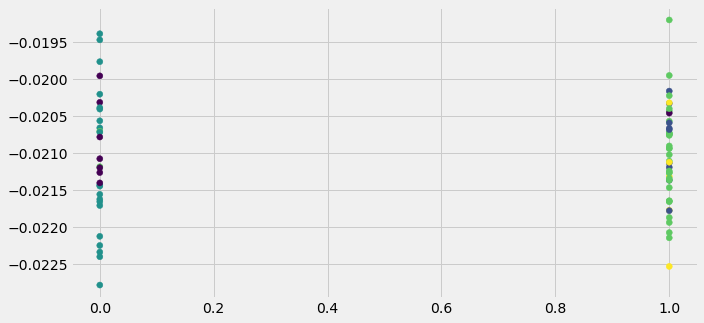

In [55]:
# Scatterplot 
plt.figure(figsize=(10, 5))  
plt.scatter(df_n['insurance'],df_n['encoded_avg'], c=kmeanModel.labels_)

### SILHOUETTE PLOT<a id="section_SIL"></a>

For n_clusters = 2 The average silhouette_score is : 0.6683540982750991
For n_clusters = 3 The average silhouette_score is : 0.6815689165894546
For n_clusters = 4 The average silhouette_score is : 0.7643301112978194
For n_clusters = 5 The average silhouette_score is : 0.799802289504289
For n_clusters = 6 The average silhouette_score is : 0.8580179920754811


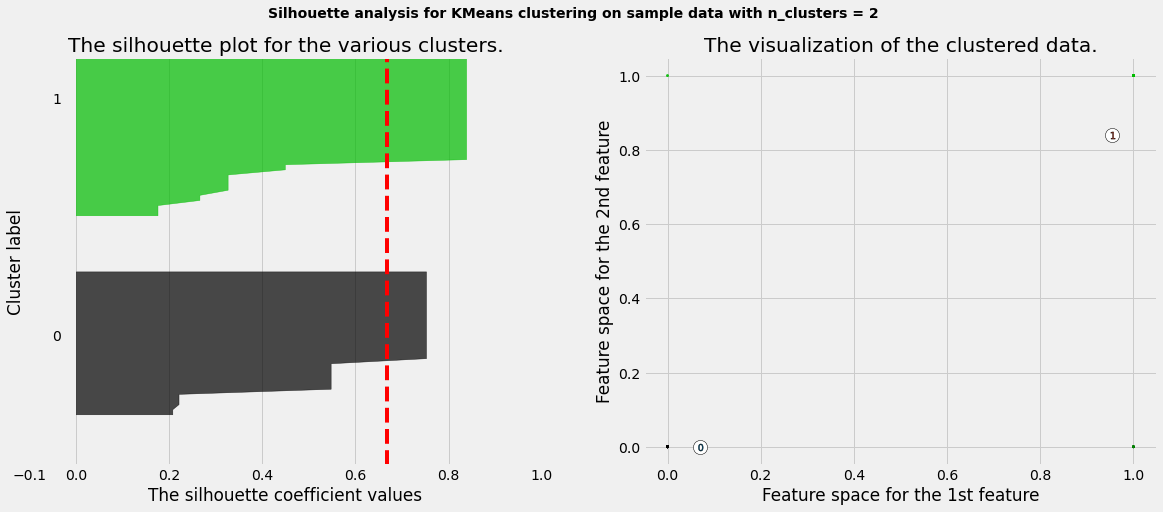

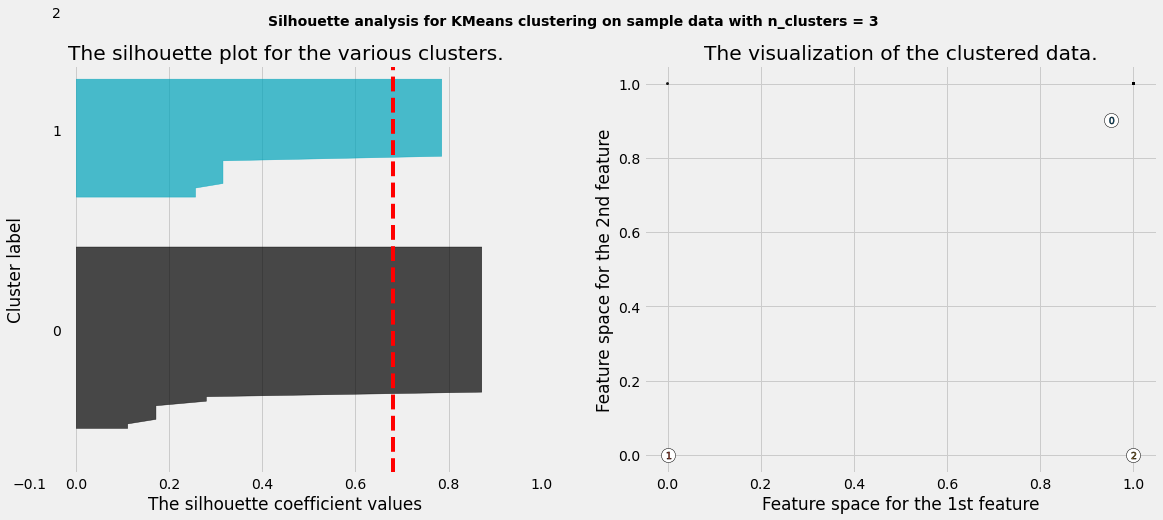

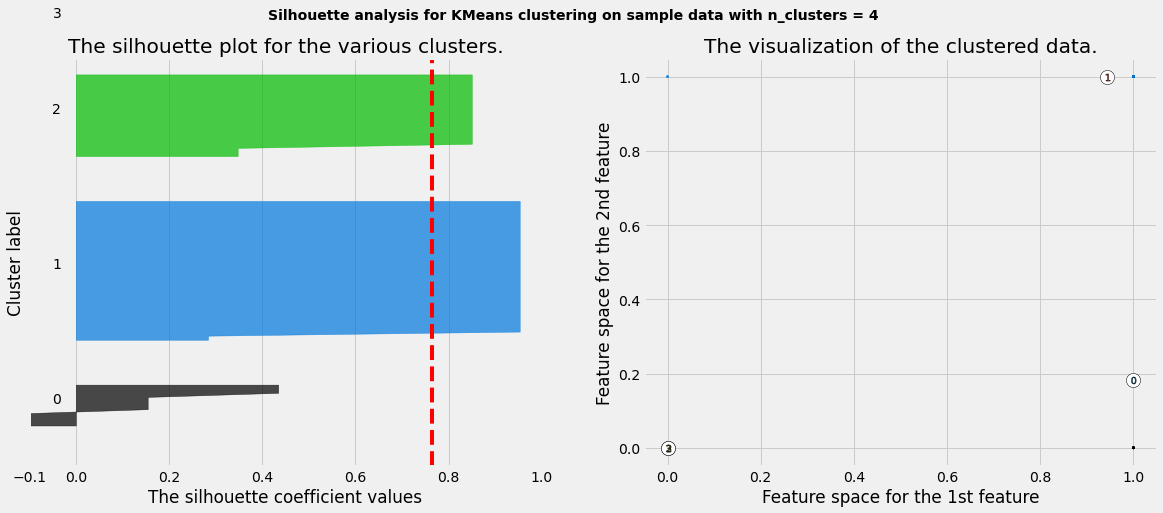

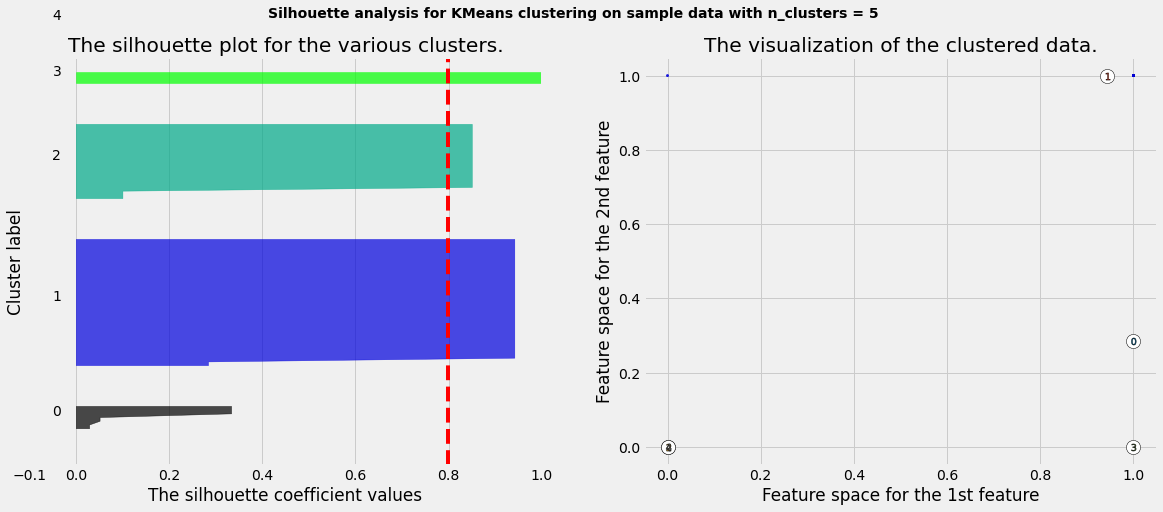

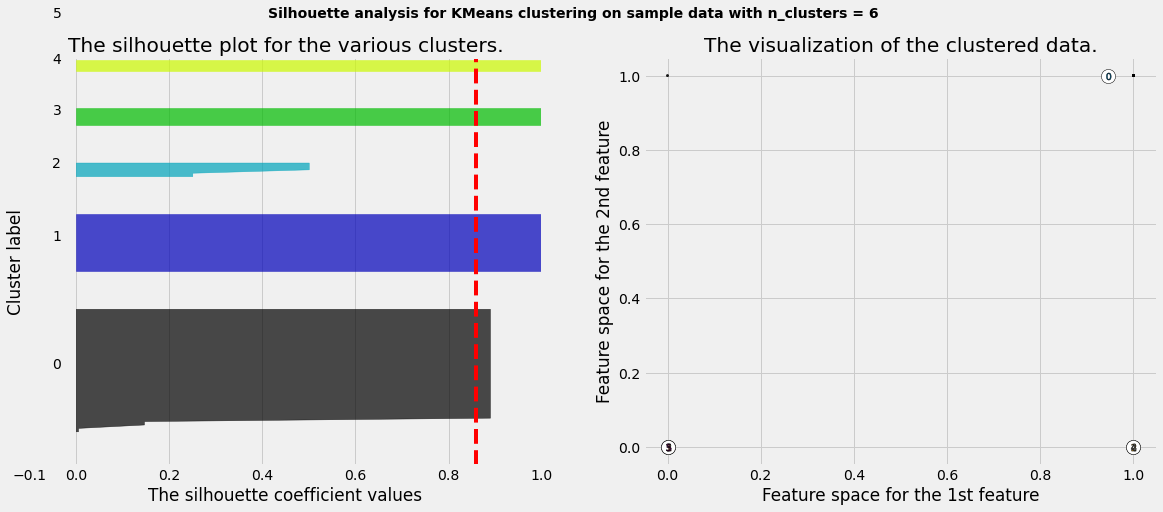

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

cols = feature_selection(data=df_n)
X, y = make_blobs(
    n_samples=50,
    n_features=1,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_n[cols])
    silhouette_avg = silhouette_score(df_n[cols], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_n[cols], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_n[cols].iloc[:, 0], df_n[cols].iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

In [58]:
print("*"*120)

************************************************************************************************************************


## CLASSIFICATION<a id="section_CLA"></a>

In [59]:
classification_data_path

'C:\\Users\\MadhurimaPau_bhbpoof\\Downloads\\Team_4\\dataset_tvar.csv'

In [60]:
data = pd.read_csv(classification_data_path)
data.head()

,Unnamed: 0,Pdf_Name,Encrypt_sha256,insurance,policy,insured,claim,number,name,form,date,details,address,Target
0,0,Admission to colleges Application Form.pdf,e94ee2d61b0a90f001683ab769d177e63645748e33f19e...,0,0,0,0,0,1,0,1,1,0,non insurance
1,1,Application for migration cetificate.pdf,08ebbaa61e41a5fffe5319bbea36bdb0051c72535ab32c...,0,0,0,0,1,1,0,1,1,0,non insurance
2,2,Application for Marks Memo.pdf,ce62ce4e894a87b3a06d35ff1c9287f9fd6d8a72b09954...,0,0,0,0,1,1,0,1,1,0,non insurance
3,3,Application Age cerificate.pdf,899d455cec574debf2a5e487a4b854995424215bfbdf30...,0,0,0,0,1,1,0,1,1,0,non insurance
4,4,ApplicationforDuplicateMemorandumofMarks.pdf,8dd9b5b4be837be4fd34adf99422912b6493c407793084...,0,0,0,0,1,1,1,1,1,1,non insurance


In [61]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,Pdf_Name,Encrypt_sha256,insurance,policy,insured,claim,number,name,form,date,details,address,Target
0,Admission to colleges Application Form.pdf,e94ee2d61b0a90f001683ab769d177e63645748e33f19e...,0,0,0,0,0,1,0,1,1,0,non insurance
1,Application for migration cetificate.pdf,08ebbaa61e41a5fffe5319bbea36bdb0051c72535ab32c...,0,0,0,0,1,1,0,1,1,0,non insurance
2,Application for Marks Memo.pdf,ce62ce4e894a87b3a06d35ff1c9287f9fd6d8a72b09954...,0,0,0,0,1,1,0,1,1,0,non insurance
3,Application Age cerificate.pdf,899d455cec574debf2a5e487a4b854995424215bfbdf30...,0,0,0,0,1,1,0,1,1,0,non insurance
4,ApplicationforDuplicateMemorandumofMarks.pdf,8dd9b5b4be837be4fd34adf99422912b6493c407793084...,0,0,0,0,1,1,1,1,1,1,non insurance


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Pdf_Name        43 non-null     object
 1   Encrypt_sha256  43 non-null     object
 2   insurance       43 non-null     int64 
 3   policy          43 non-null     int64 
 4   insured         43 non-null     int64 
 5   claim           43 non-null     int64 
 6   number          43 non-null     int64 
 7   name            43 non-null     int64 
 8   form            43 non-null     int64 
 9   date            43 non-null     int64 
 10  details         43 non-null     int64 
 11  address         43 non-null     int64 
 12  Target          43 non-null     object
dtypes: int64(10), object(3)
memory usage: 4.5+ KB


In [63]:
data['Target'].value_counts()

insurance        23
non insurance    20
Name: Target, dtype: int64

### COUNTPLOT<a id="section_CP"></a>

<AxesSubplot:xlabel='Target', ylabel='count'>

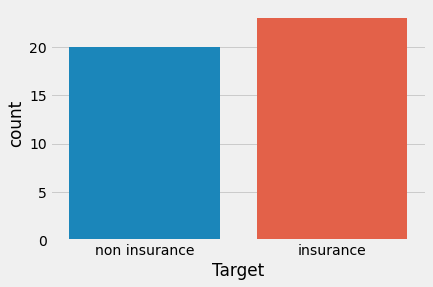

In [64]:
sns.countplot(data['Target'])

In [65]:
def changetonumerical(text):
    if text=='insurance':
        return 1
    elif text=='non insurance':
        return 0

In [66]:
data['Target']=data['Target'].apply(changetonumerical)

### HEATMAP<a id="section_HM2"></a>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'insurance'),
  Text(0, 1.5, 'policy'),
  Text(0, 2.5, 'insured'),
  Text(0, 3.5, 'claim'),
  Text(0, 4.5, 'number'),
  Text(0, 5.5, 'name'),
  Text(0, 6.5, 'form'),
  Text(0, 7.5, 'date'),
  Text(0, 8.5, 'details'),
  Text(0, 9.5, 'address'),
  Text(0, 10.5, 'Target')])

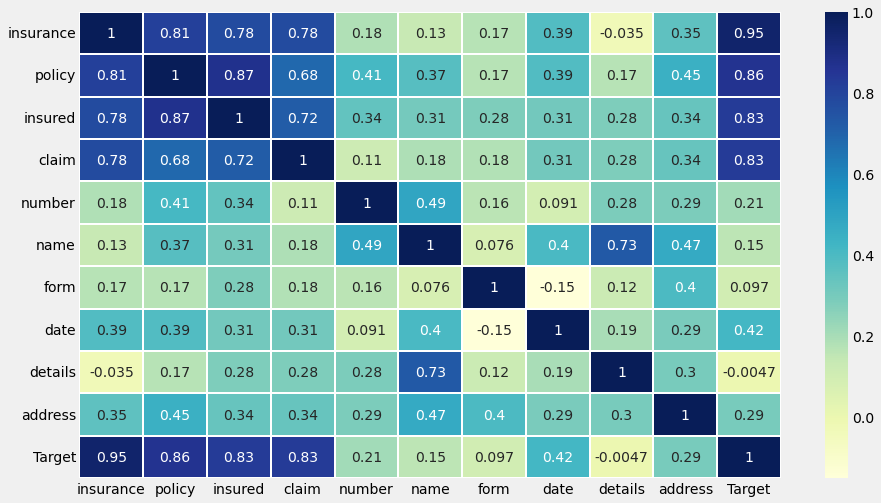

In [67]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In [68]:
data.head(2)

,Pdf_Name,Encrypt_sha256,insurance,policy,insured,claim,number,name,form,date,details,address,Target
0,Admission to colleges Application Form.pdf,e94ee2d61b0a90f001683ab769d177e63645748e33f19e...,0,0,0,0,0,1,0,1,1,0,0
1,Application for migration cetificate.pdf,08ebbaa61e41a5fffe5319bbea36bdb0051c72535ab32c...,0,0,0,0,1,1,0,1,1,0,0


In [69]:
colls=['Encrypt_sha256','Pdf_Name']

data.drop(columns=colls,axis=1,inplace=True)

In [70]:
data.head(2)

,insurance,policy,insured,claim,number,name,form,date,details,address,Target
0,0,0,0,0,0,1,0,1,1,0,0
1,0,0,0,0,1,1,0,1,1,0,0


In [71]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data["Target"]
#y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 5) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(34, 10) (34,)
(9, 10) (9,)


In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
def knn(X_train,X_test,y_train,y_test):
    classifier = KNeighborsClassifier(n_neighbors = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#     print("Confusion matrix of knn",)
#     print(confusion_matrix(y_test,y_pred))
    print("Confusion matrix of knn",confusion_matrix(y_test,y_pred),f"\nknn:{classification_report(y_test, y_pred)}")    

In [75]:
def log_re(X_train,X_test,y_train,y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_logistic_pred = model.predict(X_test)
#     print("Confusion matrix of logistic regression:",)
#     print(confusion_matrix(y_test,y_logistic_pred))
    print("Confusion matrix of logistic regression:",confusion_matrix(y_test,y_logistic_pred),f"\nlog_Reg:{classification_report(y_test,y_logistic_pred)}")
    

In [76]:
def svm(X_train,X_test,y_train,y_test):
    model = SVC()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
#     print("Confusion matrix of SVM:",)
#     print(confusion_matrix(y_test,predictions))
    print()
    print("Confusion matrix of SVM:",confusion_matrix(y_test,predictions),f"\nSVM:{classification_report(y_test,predictions)}")    

In [77]:
def dec_tree(X_train,X_test,y_train,y_test):
    treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
    treeClassifier.fit(X_train,y_train)
    y_pred = treeClassifier.predict(X_test)
#     print("Confusion matrix of Decision tree:",)
#     print(confusion_matrix(y_test,y_pred))
    print()
    print("Confusion matrix of Decision tree:",confusion_matrix(y_test,y_pred),f"\nD-Tree:{classification_report(y_test,y_pred)}")    

In [78]:
def ran_for(X_train,X_test,y_train,y_test):
    rfc = RandomForestClassifier(n_estimators=40)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print()
    print(f"Rand forest:{classification_report(y_test,rfc_pred)}")   

In [79]:
start_class= time.time()
tracemalloc.start()
   





t1 =  threading.Thread(target=knn,args=(X_train,X_test,y_train,y_test,))
t2 =  threading.Thread(target=log_re,args=(X_train,X_test,y_train,y_test,))
t3 =  threading.Thread(target=svm,args=(X_train,X_test,y_train,y_test,))
t4 =  threading.Thread(target=dec_tree,args=(X_train,X_test,y_train,y_test,))
t5 =  threading.Thread(target=ran_for,args=(X_train,X_test,y_train,y_test,))

#t=time.time()



t1.start()
t2.start()
t3.start()
t4.start()
t5.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()

end_class=time.time()
mem_CM_c ,mem_CM_p= tracemalloc.get_traced_memory()
print("the current memory used by Classification modelling part ",mem_CM_c)
print("the Peak memory used by Classification modelling part during Execution",mem_CM_p)
tracemalloc.stop()
time_CM = end_class-start_class
print(f"Runtime of classification part is : {time_CM} secs")



Confusion matrix of logistic regression: [[5 0]
 [0 4]] 
log_Reg:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion matrix of knn [[5 0]
 [0 4]] 
knn:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion matrix of SVM: [[5 0]
 [0 4]] 
SVM:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy              

## VISUALIZATION IN CLASSIFICATION

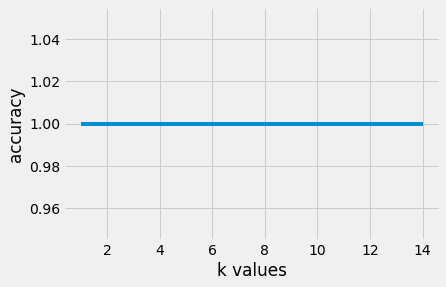

In [80]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

### CONFUSION MATRIX<a id="section_CM"></a>

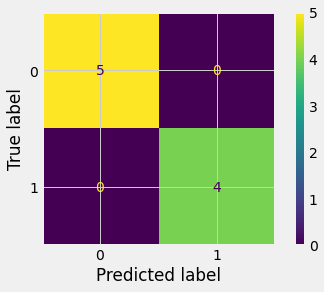

In [81]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(model,X_test,y_test)

### DECISION TREE PLOT<a id="section_DTP"></a>

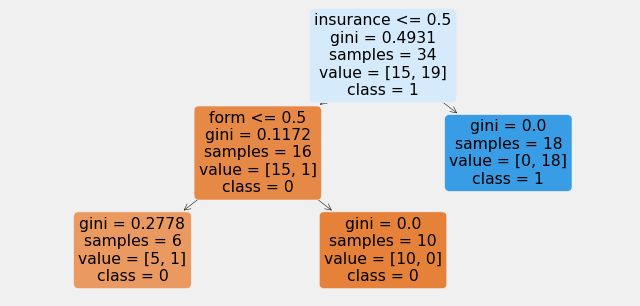

In [82]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
treeClassifier.fit(X_train,y_train)
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(10,5))
dt = plot_tree(treeClassifier, 
                   feature_names=data.columns,  
                   class_names=["0","1"],
                   filled=True,precision=4,rounded=True)

### Random Forest Plot<a id="section_RFP"></a>

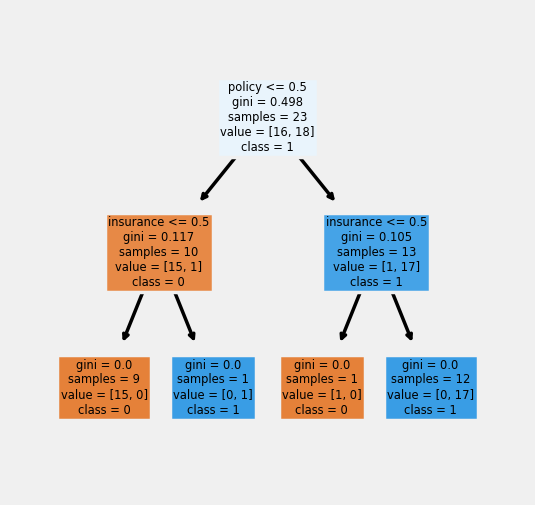

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train, y_train)
fn=data.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=500)
tree=plot_tree(rfc.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [84]:
def time_mem():
    a = {"currentMemory":[mem_DE_c,mem_CT_c,mem_CM_c],
    "peakMemory":[mem_DE_p,mem_CT_p,mem_CM_p],
    "timeTaken":[time_DE,time_CT,time_CM]}
    index_ = ["Data Engineering","Clustering","Classification"]
    tm = pd.DataFrame(a,index = index_)
    print(tm)

In [85]:
time_mem()

                  currentMemory  peakMemory   timeTaken
Data Engineering        5122410   387916648  272.795464
Clustering               831196      928272    0.298307
Classification           466627      547783    0.204146


-  A kibibit (a contraction of kilo binary digit) or sometimes Kib.
-  1 Kib = 128 bytes.
-  1 MB  = 7812.5 Kib

### Learning Outcomes : <a id="section_LO"></a>
  While feature extraction , we learned about :
* sha256 & hashlib library
* pdf2image library (how a pdf document can be converted to image)
* Image processing & text recognition using OCR library Tesseract of Google and Python Imaging Library(PIL)
* Different Natural Language Processing (NLP) techniques for cleaning and extracting features from the content of the document.
* Kmeans clustering
* Elbow method for finding number of clusters
* Dendograms for visualizing the hierarchical clustering
* Agglomerative Clustering
* Mini Batch Kmeans
* Silhoutte metrics & Visualization
* DBScan
* Classification algorithms for testing the clusters.
* Tracemalloc,that traces every memory block in python
* Multithreading

## References<a id="section_REF"></a>

* Google images
* Stack Overflow for errors
* https://www.lucidchart.com - for flow diagram
* https://github.com/fabiomus - for sha256
* https://www.youtube.com/watch?v=SVmZZK11Tjc - for sha256
* https://www.geeksforgeeks.org/ 
* https://scikit-learn.org/stable/index.html
* https://github.com/utkuozbulak/unsupervised-learning-document-clustering
* https://www.youtube.com/watch?v=PJ4t2U15ACo&t=328s - for multi threading
* https://github.com/codebasics/py/blob/master/Multiprocessing/multthreading_introduction.py - for multithreading

In [86]:
print("*"* 120)

************************************************************************************************************************
